In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
import numpy as np

In [4]:
df=pd.read_csv(r"C:\Users\aksha\Downloads\water.csv",header=0,index_col=0,parse_dates=True)

In [5]:
df

,Water
Year,
1885-01-01,356
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413
...,...
1959-01-01,594
1960-01-01,587
1961-01-01,587


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79 entries, 1885-01-01 to 1963-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Water   79 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


In [7]:
df.describe()

,Water
count,79.000000
mean,512.025316
std,75.685072
min,344.000000
25%,462.000000
50%,503.000000
75%,581.000000
max,662.000000


In [13]:
df.isnull()

,Water
Year,
1885-01-01,False
1886-01-01,False
1887-01-01,False
1888-01-01,False
1889-01-01,False
...,...
1959-01-01,False
1960-01-01,False
1961-01-01,False


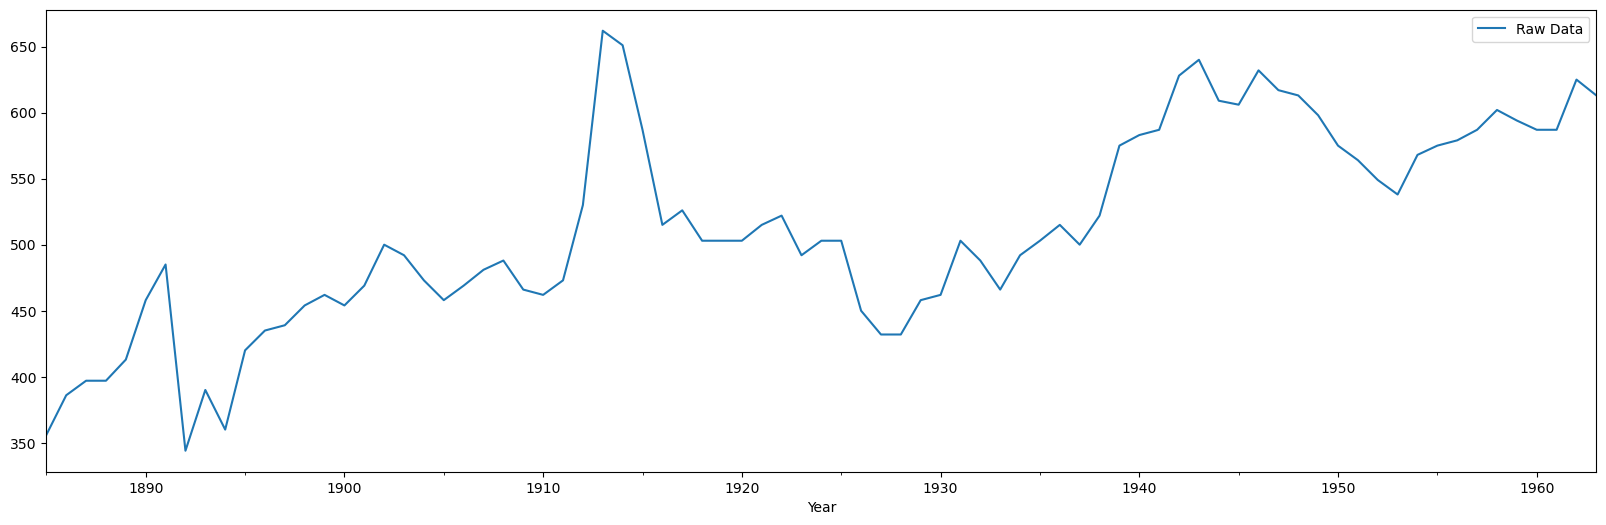

In [20]:
plt.figure(figsize=(20,6))
df['Water'].plot(label='Raw Data',legend=True)
plt.show()

In [22]:
split_point=len(df)-10
dataset1,validation1=df[:split_point],df[split_point:]
print('dataset %d,validation %d' % (len(dataset1),len(validation1)))
dataset1.to_csv('dataset.csv',header=True)#creating csv file
validation1.to_csv('validation.csv',header=True)#creating csv file

dataset 69,validation 10


### build model based on optimized values

In [58]:
from statsmodels.tsa.arima.model import ARIMA
import numpy

In [25]:
train=pd.read_csv('dataset.csv',index_col=0,parse_dates=True)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69 entries, 1885-01-01 to 1953-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Water   69 non-null     int64
dtypes: int64(1)
memory usage: 1.1 KB


In [35]:
x=train.values#taking value in form of array x is an array now

In [31]:
x=x.astype("float32")#change datatype

In [33]:
x.shape

(69, 1)

In [36]:
x

array([[356],
       [386],
       [397],
       [397],
       [413],
       [458],
       [485],
       [344],
       [390],
       [360],
       [420],
       [435],
       [439],
       [454],
       [462],
       [454],
       [469],
       [500],
       [492],
       [473],
       [458],
       [469],
       [481],
       [488],
       [466],
       [462],
       [473],
       [530],
       [662],
       [651],
       [587],
       [515],
       [526],
       [503],
       [503],
       [503],
       [515],
       [522],
       [492],
       [503],
       [503],
       [450],
       [432],
       [432],
       [458],
       [462],
       [503],
       [488],
       [466],
       [492],
       [503],
       [515],
       [500],
       [522],
       [575],
       [583],
       [587],
       [628],
       [640],
       [609],
       [606],
       [632],
       [617],
       [613],
       [598],
       [575],
       [564],
       [549],
       [538]], dtype=int64)

In [40]:
from statsmodels.graphics.tsaplots import plot_predict

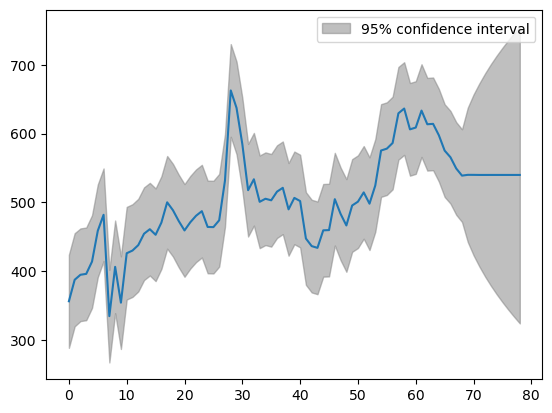

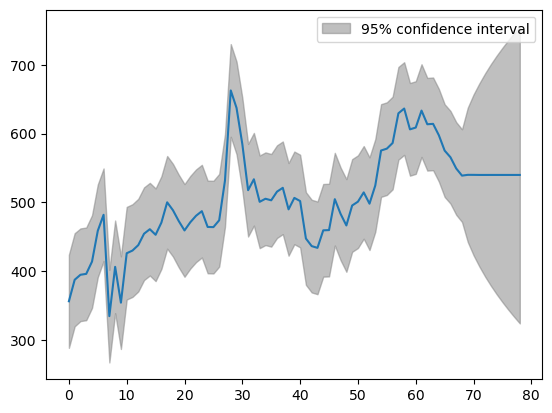

In [70]:
# fit model
model=ARIMA(x,order=(2,1,0))
model_fit=model.fit()
forecast=model_fit.forecast(10)
plot_predict(model_fit,1,79)

### here from the graph upto 69 it is the orginal value and after that it is the predicted value

In [71]:
from sklearn.metrics import mean_squared_error

In [75]:
val=pd.read_csv('validation.csv')
rmse=np.sqrt(mean_squared_error(val.Water,forecast))
rmse

567.6092846031631

### combine train and test data and forecast for next 10 years

In [76]:
final_model=ARIMA(df,order=(4,1,0))
model_fit=final_model.fit()

C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


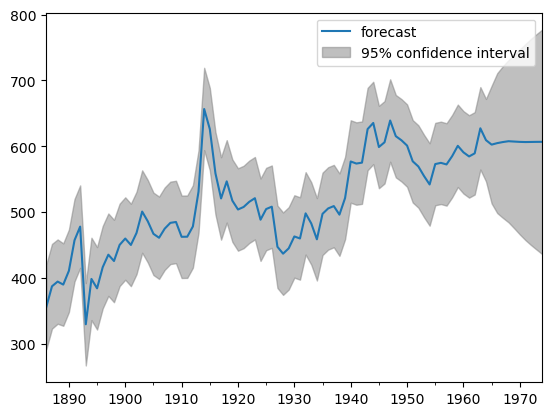

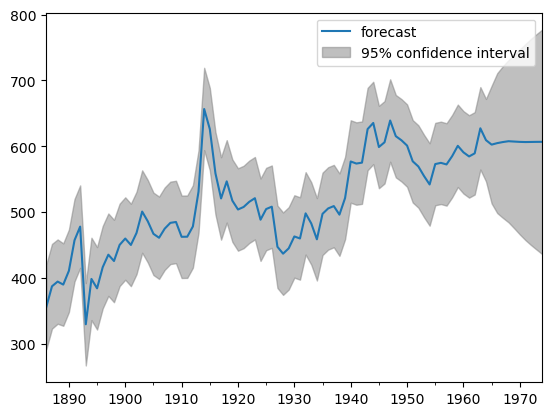

In [77]:
plot_predict(model_fit,1,89)